## Aula 26 - NLP
### Desafio - Possibilidades de melhorar o modelo

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from utils.confusion_matrix import plot_confusion_matrix
from utils.to_dense import DenseTransformer

pd.options.display.max_columns = 999
pd.options.display.max_colwidth = 999

In [2]:
train_df = pd.read_pickle('data/processed/train_preprocessed.pickle')
test_df = pd.read_pickle('data/processed/test_preprocessed.pickle')
#train_df

In [3]:
train_df['y'] = (train_df['polarity'] == 'positive').astype(int)
test_df['y'] = (test_df['polarity'] == 'positive').astype(int)

In [4]:
X_train = train_df['norm_text'].values
y_train = train_df['y'].values
X_test = test_df['norm_text'].values
y_test = test_df['y'].values

In [5]:
steps = [
    ('vect', CountVectorizer(binary=True)),
#    ('dens', DenseTransformer()),
    ('clf', LogisticRegression())
]

pipeline = Pipeline(steps)

Confusion matrix, without normalization
[[16  7]
 [ 0 59]]
Normalized confusion matrix
[[ 0.69565217  0.30434783]
 [ 0.          1.        ]]


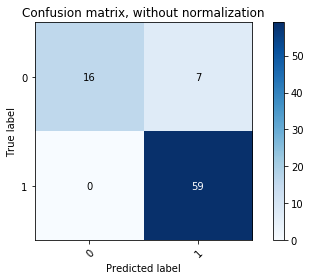

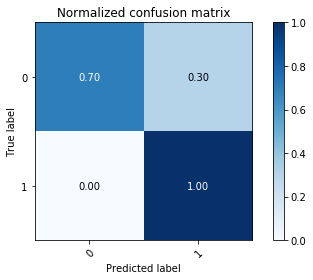

In [6]:
sentiment_analyzer = pipeline.fit(X_train, y_train)
y_pred = sentiment_analyzer.predict(X_test)
plot_confusion_matrix(y_test, y_pred);
plot_confusion_matrix(y_test, y_pred, normalize=True);

##### Naive Bayes: 
- [Esse post](https://towardsdatascience.com/algorithms-for-text-classification-part-1-naive-bayes-3ff1d116fdd8) explica um pouco da ideia do algoritmo e fala sobre como ele e regressão logística são "os básicos" em NLP;

- No Scikit Learn, temos [vários modelos NaiveBayes](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.naive_bayes). 

- De uma olhada no [MultinomialNB](https://scikit-learn.org/0.19/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB), refaça o treinamento usando ele como classificador e compare os resultados.

Dicas: 
1. Você precisará incluir no seu pipeline a classe *DenseTransformer* (do `to_dense.py` do diretório `utils`)

2. Experimente valores diferentes para os parâmetros, especialmente o "alpha", que na verdade é o *Laplace Smoothing* explicado [nesse vídeo](https://www.youtube.com/watch?v=gCI-ZC7irbY&t=84s).

In [7]:
steps = [
    ('vect', CountVectorizer(binary=True)),
    ('dens', DenseTransformer()),
    ('clf', MultinomialNB(alpha=0,fit_prior=False))
]

pipeline = Pipeline(steps)

/Users/macbook/anaconda3/envs/tera-env/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Confusion matrix, without normalization
[[22  1]
 [ 3 56]]
Normalized confusion matrix
[[ 0.95652174  0.04347826]
 [ 0.05084746  0.94915254]]


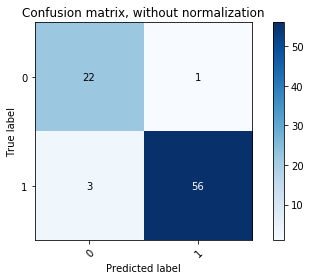

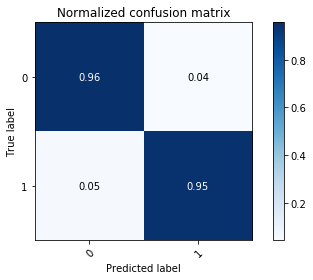

In [8]:
sentiment_analyzer = pipeline.fit(X_train, y_train)
y_pred = sentiment_analyzer.predict(X_test)
plot_confusion_matrix(y_test, y_pred);
plot_confusion_matrix(y_test, y_pred, normalize=True);

#### Word2Vec

[Vídeo introdutório](https://www.youtube.com/watch?v=5PL0TmQhItY)

Veja o [Word2Vec do Gensim](https://radimrehurek.com/gensim/models/word2vec.html#gensim.models.word2vec.Word2Vec) e [esse tutorial](https://www.kaggle.com/pierremegret/gensim-word2vec-tutorial) para utilizá-lo.

[Aula de NLP da Cinthia](https://github.com/somostera/tera-datascience-out2018/tree/master/26-nlp) de uma turma de Data Science do ano passado: 
- links bastante interessantes no `ReadME`, como o [desse vídeo](https://www.youtube.com/watch?v=ERibwqs9p38) que é uma aula de Word2Vec da Stanford.
- No [notebook parte 2](https://github.com/somostera/tera-datascience-out2018/blob/master/26-nlp/nlp_parte_2.ipynb) tem Word2Vec;
- E no [na parte 3](https://github.com/somostera/tera-datascience-out2018/blob/master/26-nlp/nlp_parte_extra.ipynb) tem visualizações.